# Convolución Animada
***
## integrantes :
- Felipe Véliz ; felipe.veliz@alumnos.uach.cl

- Leonardo Santos ; leonardo.santos@alumnos.uach.cl

***

## Profesor:

Victor Poblete

## Asignatura:

ACUS099





# Introducción 
----
***

# Objetivo 

El objetivo de este trabajo es mostrar paso a paso el proceso de convolución, de forma animada, usando lenguaje de programación python 


## Librerias a usar

In [3]:
from scipy import signal
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Image

## Definiendo funciones

Las funciones que usaremos son las siguientes

- **stem:** Grafica simple con eje *x* e *y*

In [12]:
def stem(n,x):
    
    
    plt.rcParams["figure.figsize"]=(16,5) 
    markerline, stemlines, baseline = plt.stem(n, x, markerfmt='o', label='x')
    plt.setp(stemlines, 'color', plt.getp(markerline,'color'))
    plt.setp(stemlines, 'linestyle', 'dotted')
    #tamaño de la figura

    plt.legend()
    plt.show()
    
    
def stem2(n,x,ax):
    
    plt.rcParams["figure.figsize"]=(16,5) 
    markerline, stemlines, baseline = plt.stem(n, x, markerfmt='o', label='x')
    ax.setp(stemlines, 'color', plt.getp(markerline,'color'))
    plt.setp(stemlines, 'linestyle', 'dotted')
    #tamaño de la figura

    ax.legend()
    plt.show()

# Definiendo variables

Las variables que usaremos serán las siguientes

- **x:** Lista de amplitudes de la señal *x*
- **x_n:** Lista de las posiciones de las amplitudes de la señal *x*


- **h:** Lista de amplitudes de la señal *h*
- **h_n:** Lista de las posiciones de las amplitudes de la señal *h*

- **minposx_n:** El minimo valor de *x_n*
- **maxposh_n:** El maximo valor de *h_n*


- **n:** Eje de posiciones para el gráfico, construido en como un arreglo numpy en base al minimo de *x_n* y al maximo de *h_n*


- **c:** Cantidad de ceros a los costados
- **C:** Cantidad de ceros entre las señales

In [51]:
x=[1,3,5,7,9]
x_n=[-13,-12,-11,-10,-9]

h=[1,1,1,1,1]
h_n=[9,10,11,12,13]

minposx_n=min(x_n)
maxposh_n=max(h_n)


c=2

n1=np.arange(minposx_n-c,maxposh_n+c+1)
n=n1.tolist()

C=abs((len(x)+c)+(len(h)+c)-len(n))

# Graficando ambas señales en una figura

En primera instancia, siempre es mejor ver como y con que elementos vamos a trabajar, por lo que graficar ambas señales es primordial para poder llegar a una convolucion animada.

Si queremos graficar las señales, debemos agregar elementos a la lista, de esta forma evitaremos problemas con la funcion stem, de otro modo nos arrojaria un error de forma o "shape", lo cual nos indica que los largos de ambas listas no coinciden.

In [53]:
K=x+h
L=x_n+h_n

print(K)
print(L)
print(n)

[1, 3, 5, 7, 9, 1, 1, 1, 1, 1]
[-13, -12, -11, -10, -9, 9, 10, 11, 12, 13]
[-15, -14, -13, -12, -11, -10, -9, -8, -7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]


[0, 0, 1, 3, 5, 7, 9, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0]


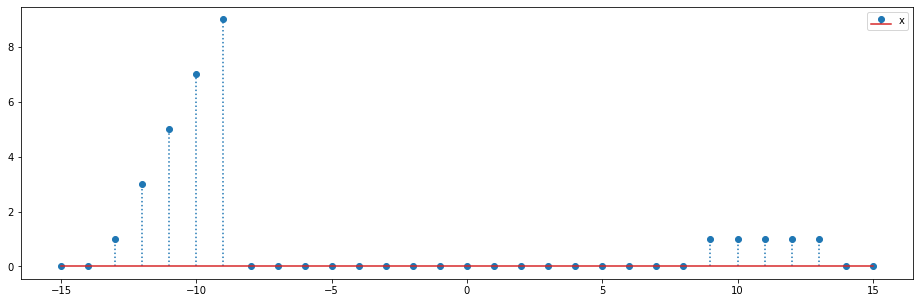

In [36]:
y_1=0
u_1=0
r_1=[]

for i in n:
    for l in L:
        #print(i,l)
        if i==l:
            r_1.append(K[y_1])
            y_1=y_1+1
            u_1=1
            
    if u_1==0:
        r_1.append(0)
    elif u_1==1:
        u_1=0
        
print(r_1)
stem(n,r_1)

# Comienza el movimiento

En esta parte del codigo, propusimos sumar 1 a las posiciones de la señal que se moverá, ya que anteriormente verificamos las posiciones para asignar su correspondiente amplitud al momento de graficar. Luego, es guardada y sobrescrita en la variable L.

Al llegar el momento de superposicion de elementos, tenemos un problema de formas nuevamente, ya que el codigo agrega un 0 a la izquierda de la señal. Para solucionar esto, decidimos cambiar el largo de n cada vez que se agregue un 0.

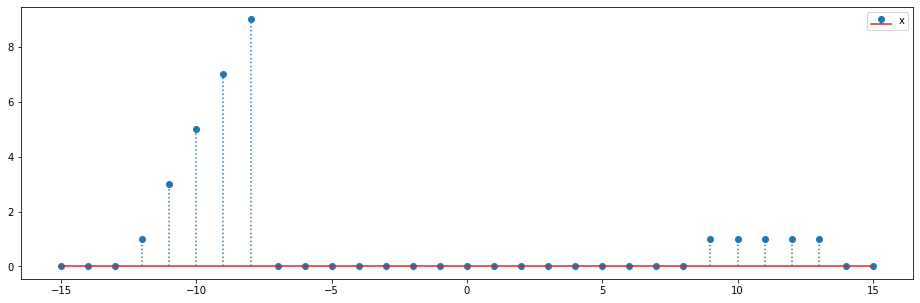

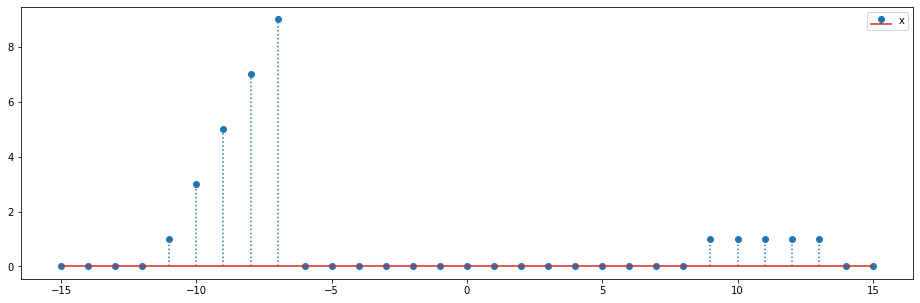

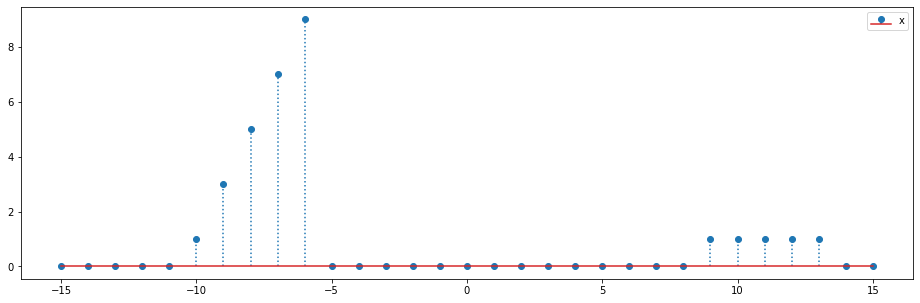

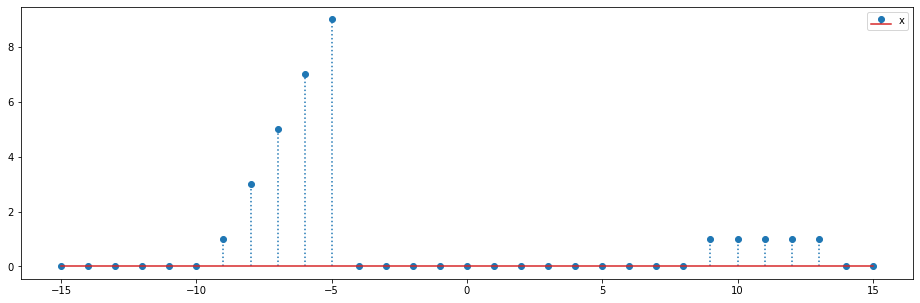

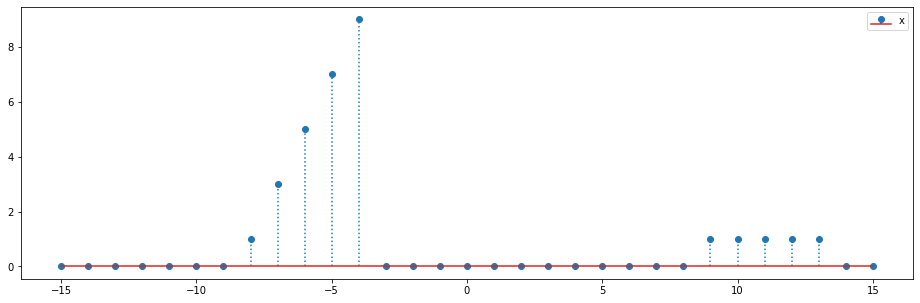

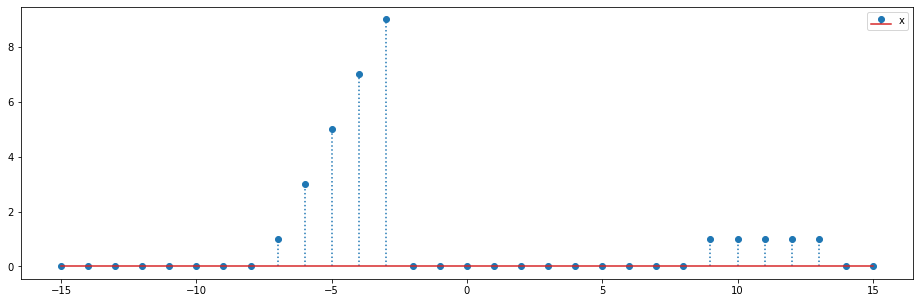

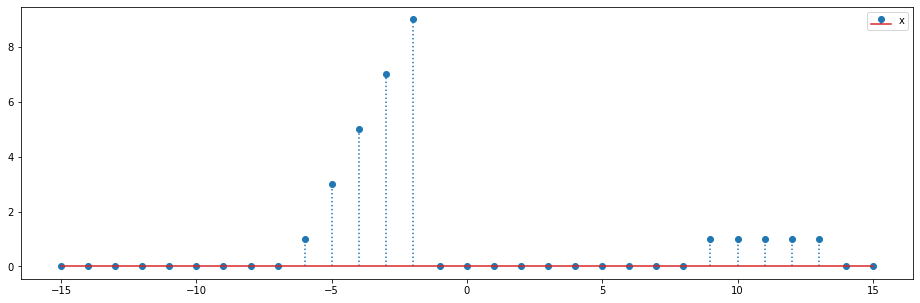

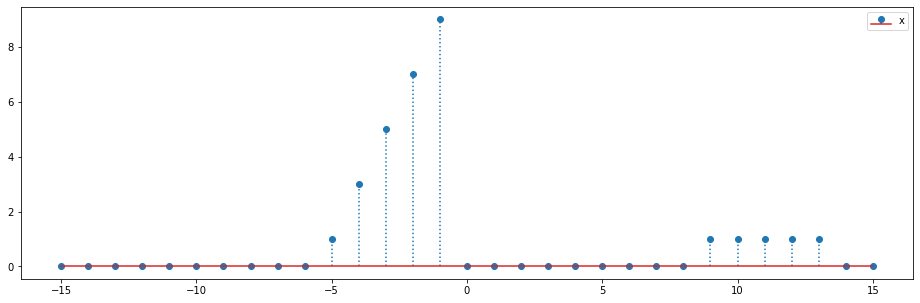

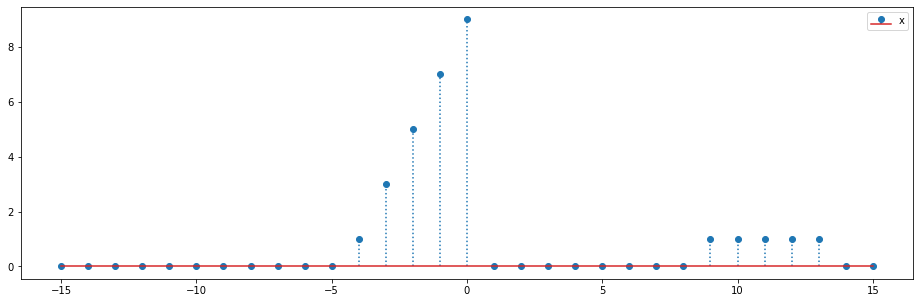

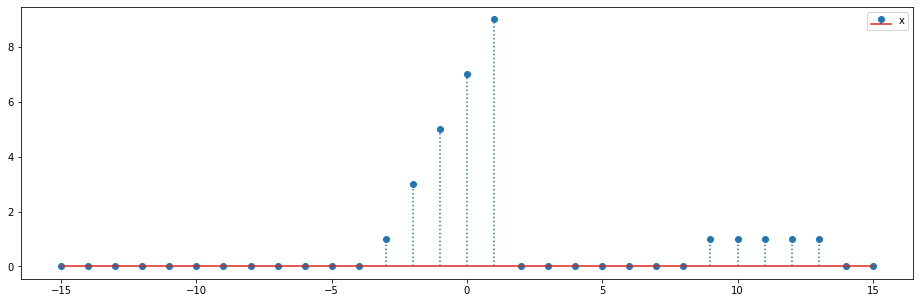

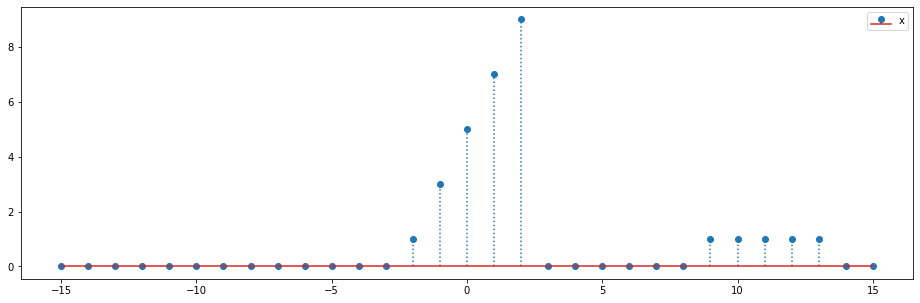

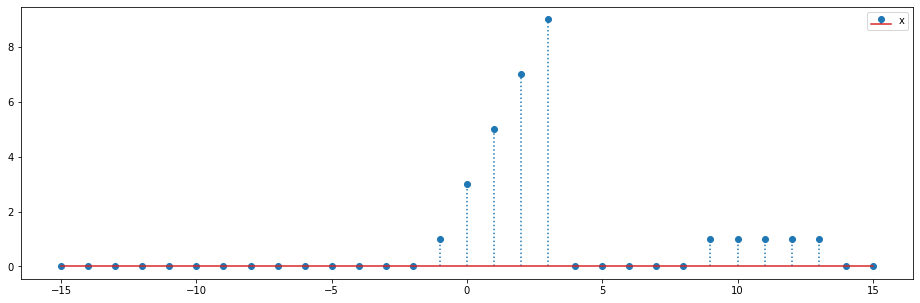

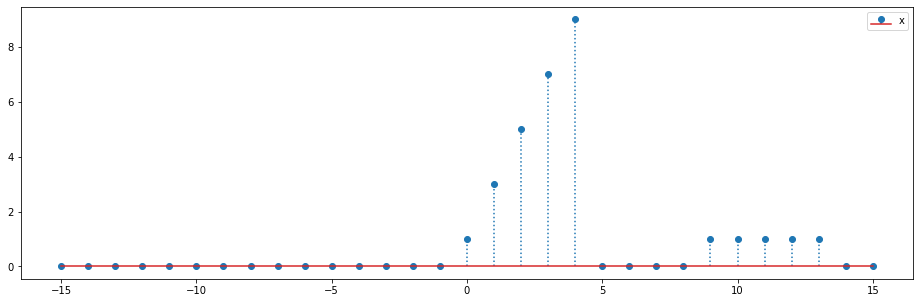

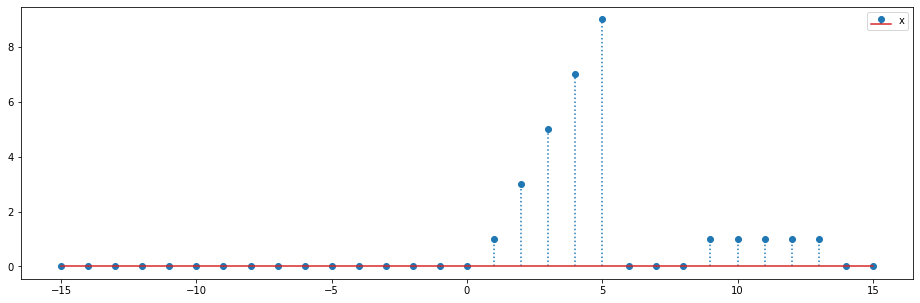

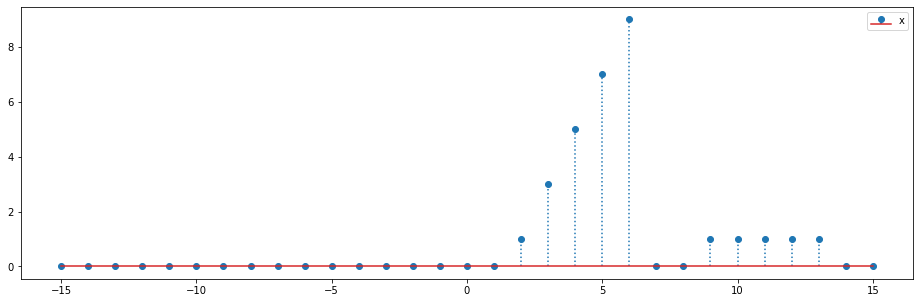

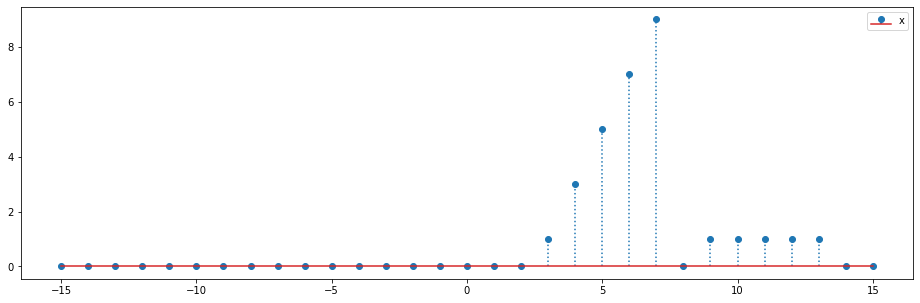

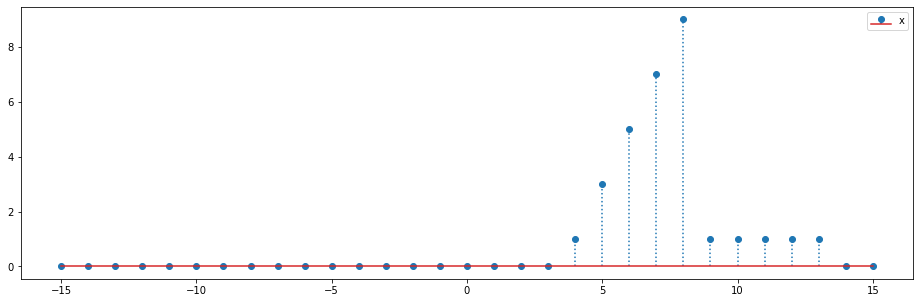

[4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
[-15, -14, -13, -12, -11, -10, -9, -8, -7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 5, 7, 9, 1, 1, 1, 1, 1, 0, 0]
[1, 3, 5, 7, 9, 1, 1, 1, 1, 1]


In [57]:
#cantidad de veces que se mueve

for a in range(C):
    
    for R in range (len(x_n)):
             x_n[R]=x_n[R]+1

    L1=x_n+h_n

    y_1=0
    u_1=0

    r_1=[]

    for i in n:
            for l in L1:
                if i==l:
                    r_1.append(K[y_1])
                    y_1=y_1+1
                    u_1=1

            if u_1==0:
                r_1.append(0)

            elif u_1==1:
                u_1=0
    stem(n,r_1)
                
print(L1)            
print(n)    
print(r_1)
print(K)

## Convolución

En la siguiente celda sucede la convolucion. Para esto necesitamos crear un arreglo de ceros con numpy que tenga una dimension igual al largo de la suma de las señales. Luego "flipeamos" la señal que se movió en el grafico anterior,es decir, la volteamos. Creamos un nuevo arreglo con la lista h, que tenga la misma cantidad de ceros a la izquierda y a la derecha que el largo de la señal x. 

A medida que las señales se superponen, se multiplican y se suman. Cada paso que dan es una nueva amplitud para la nueva señal Y


[9 7 5 3 1]
[0 0 0 0 0 1 1 1 1 1 0 0 0 0 0]


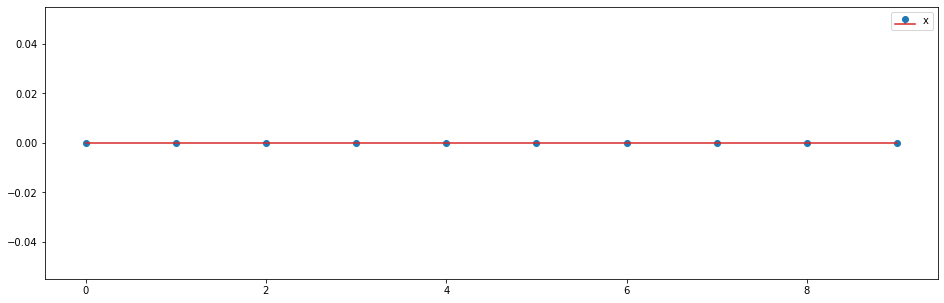

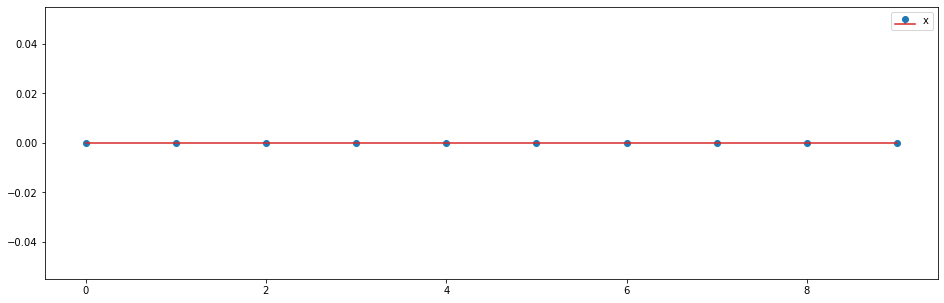

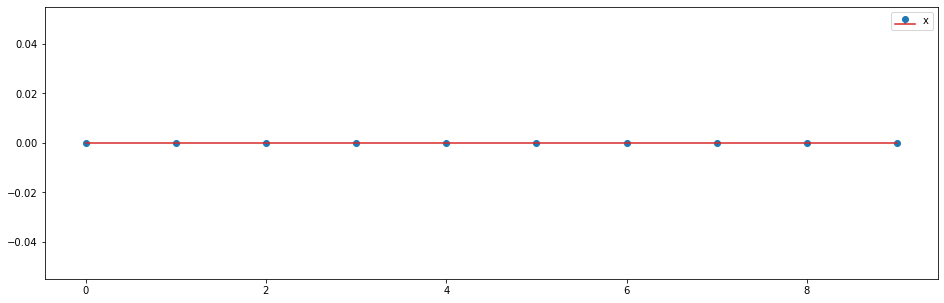

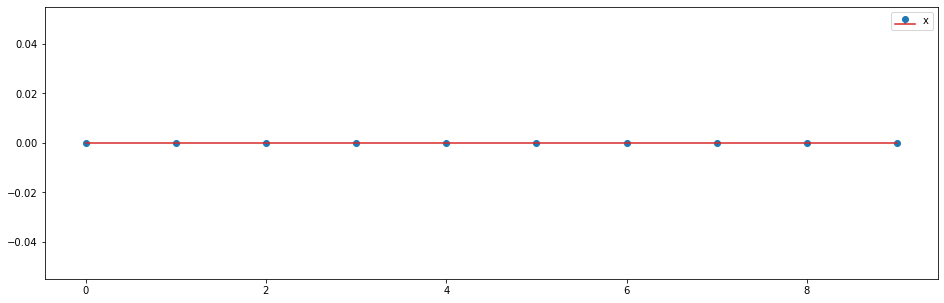

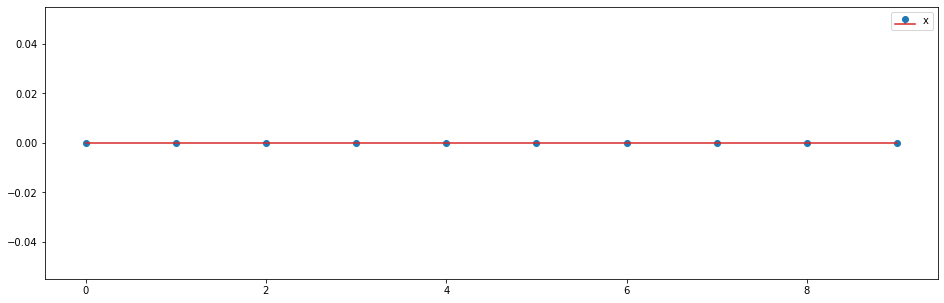

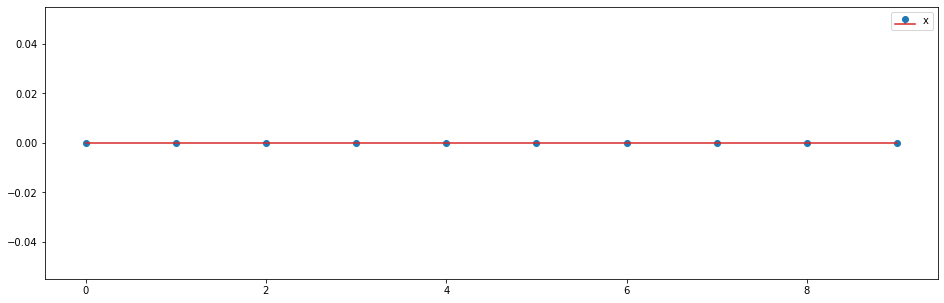

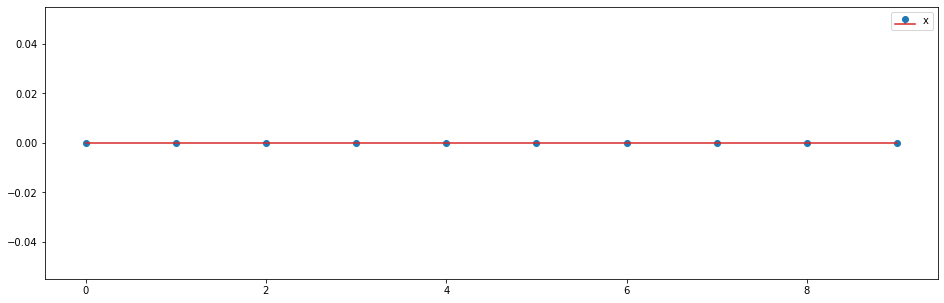

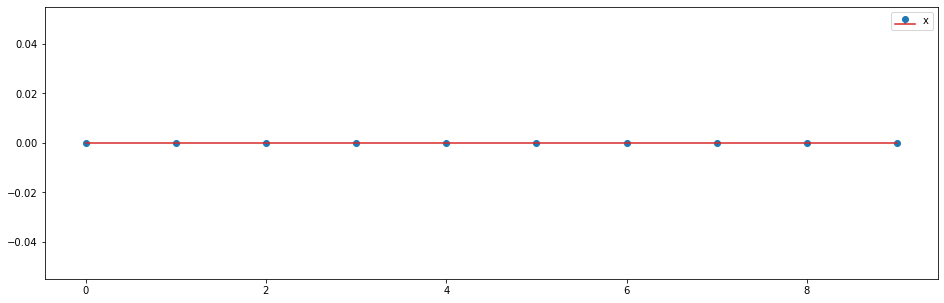

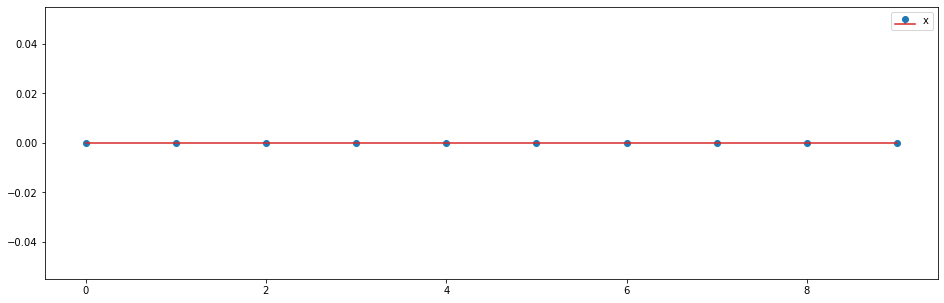

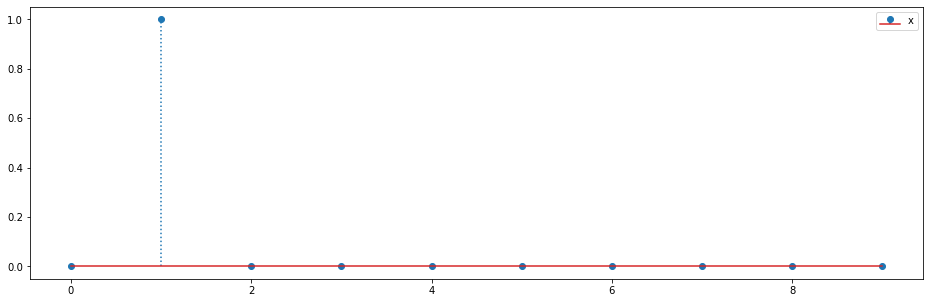

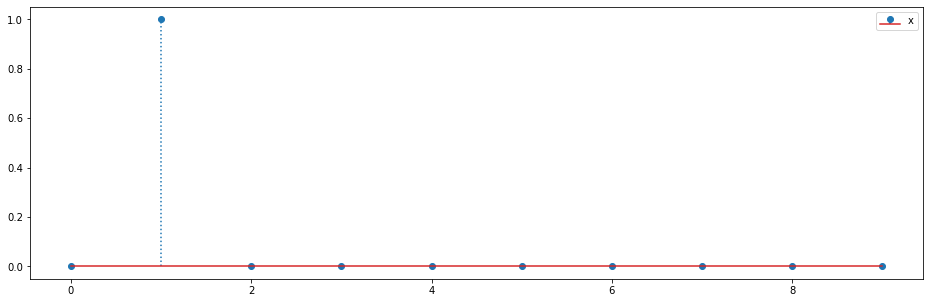

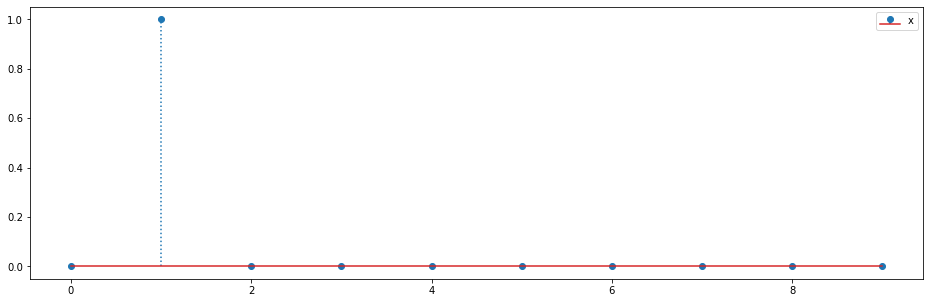

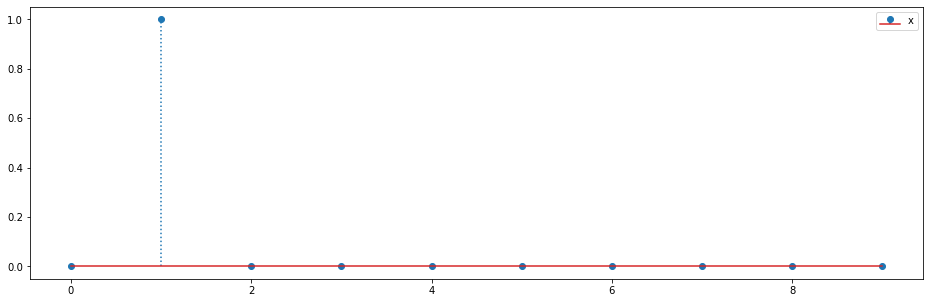

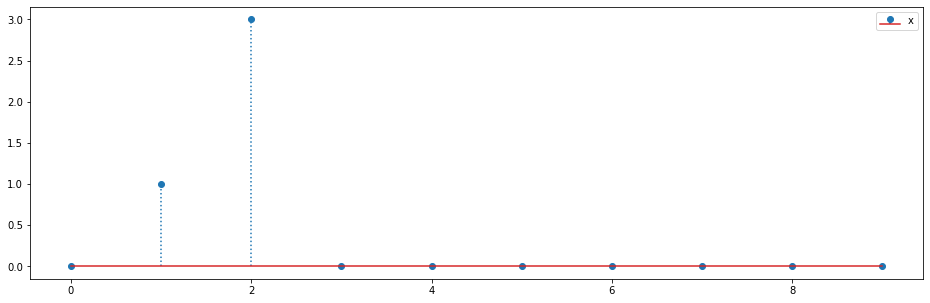

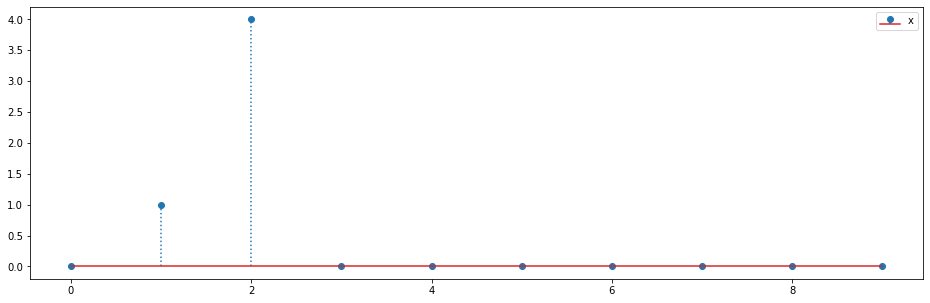

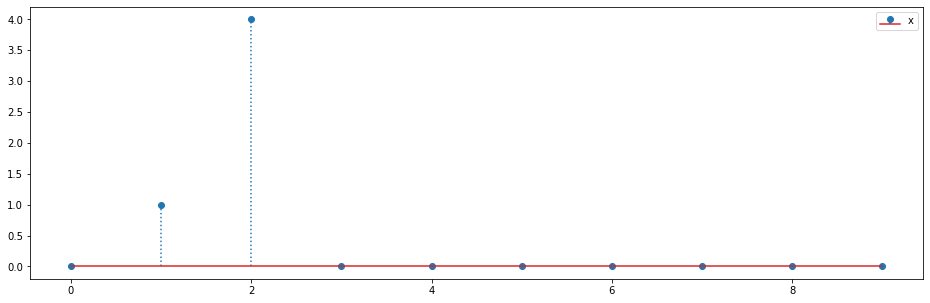

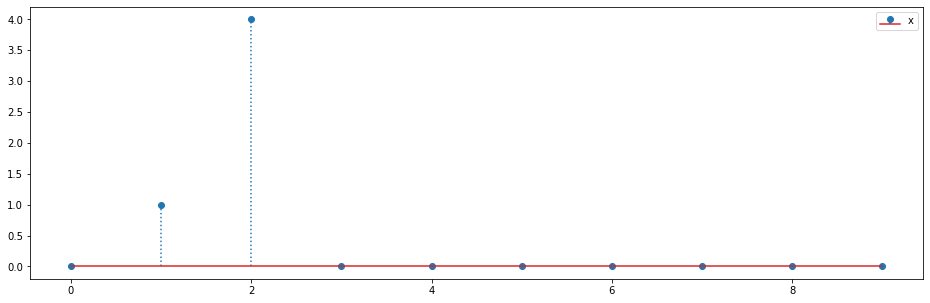

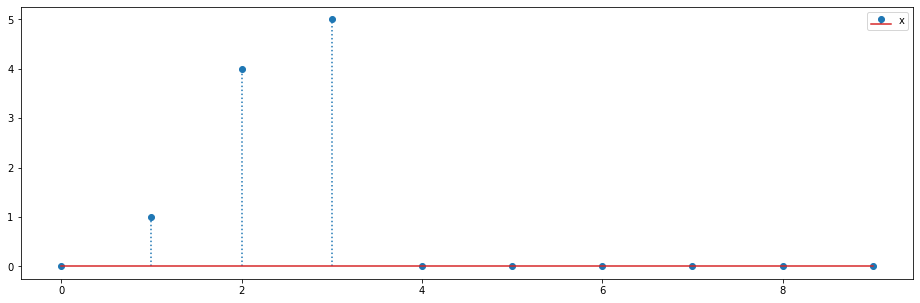

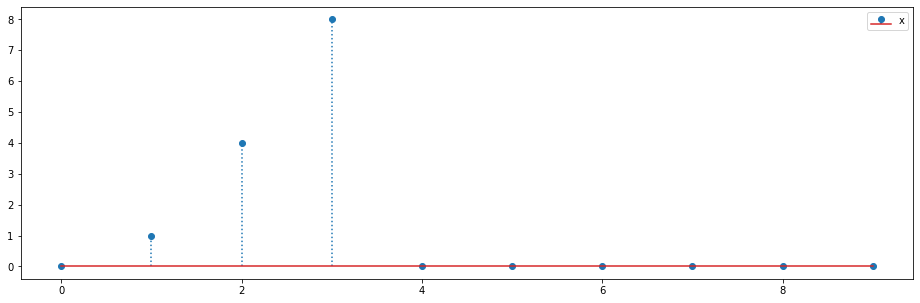

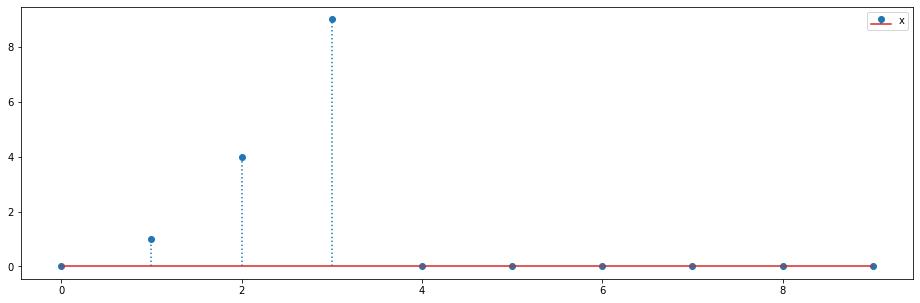

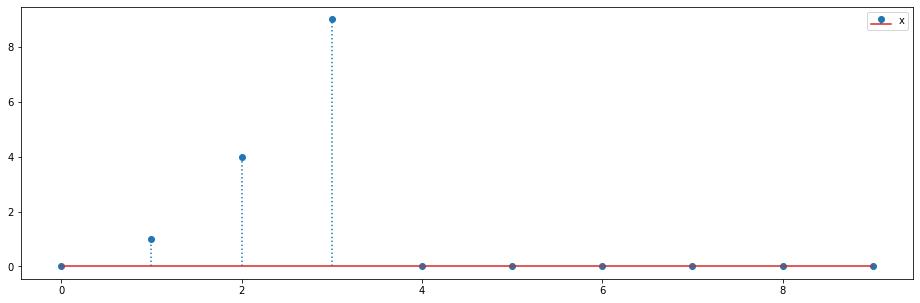

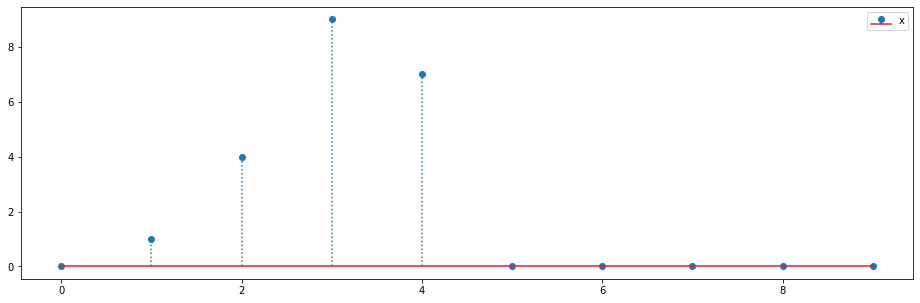

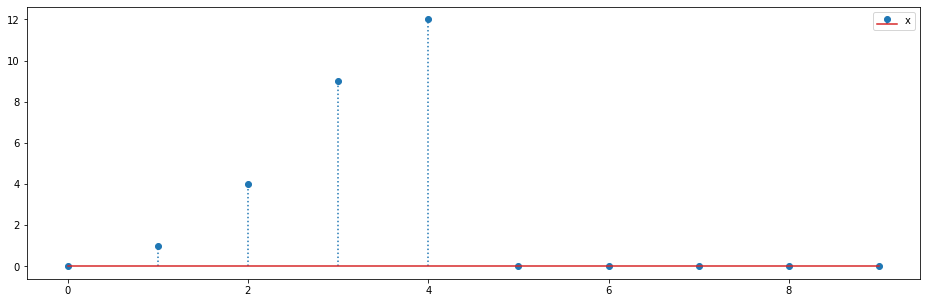

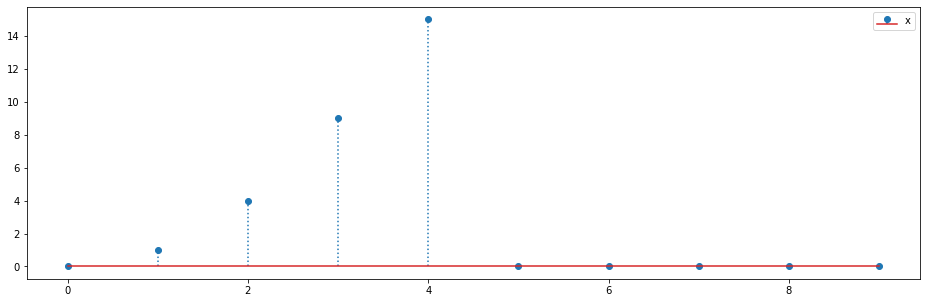

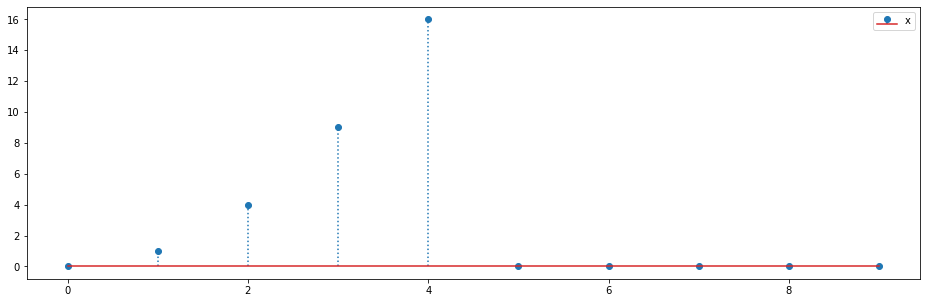

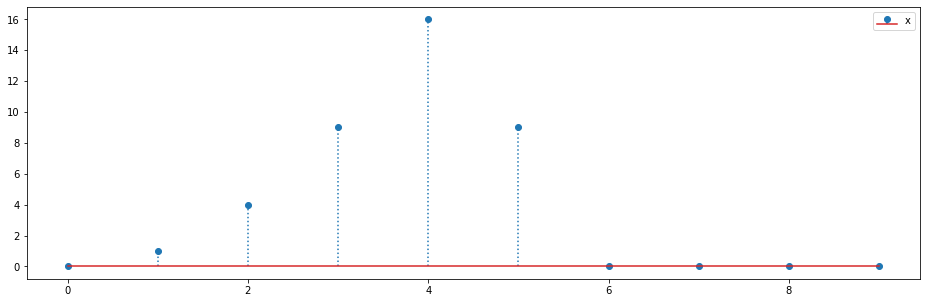

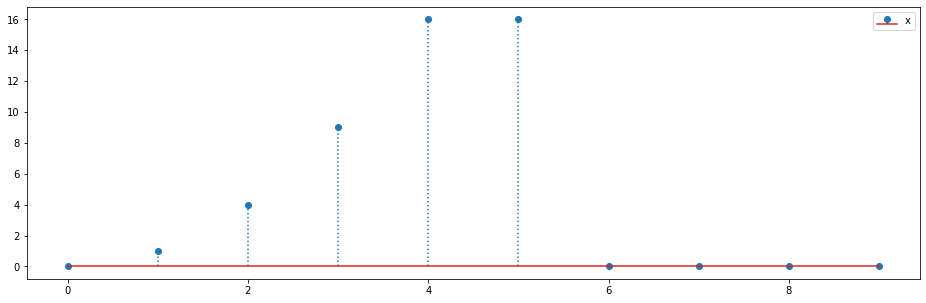

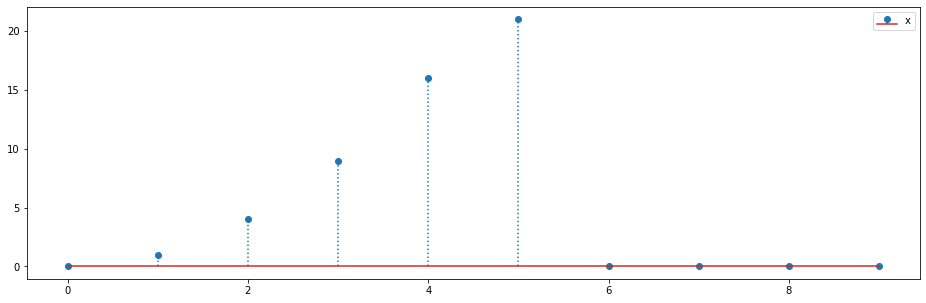

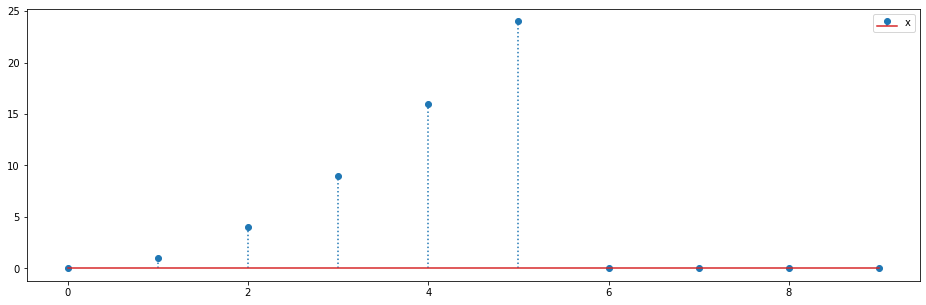

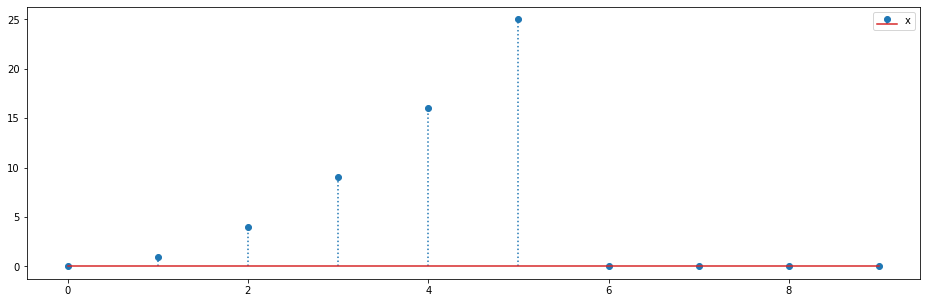

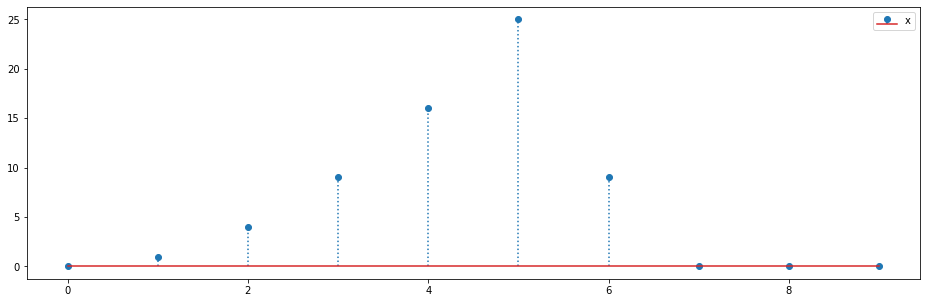

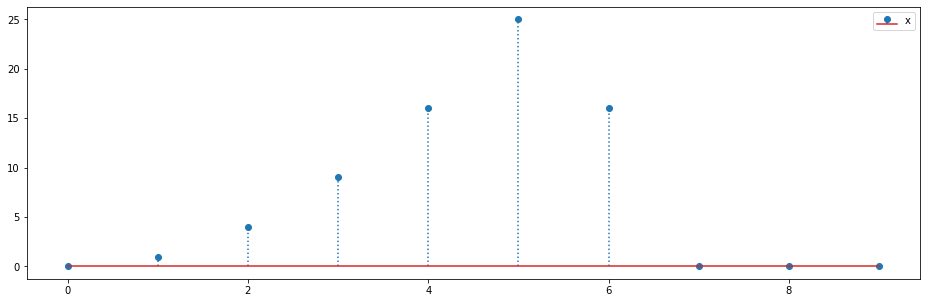

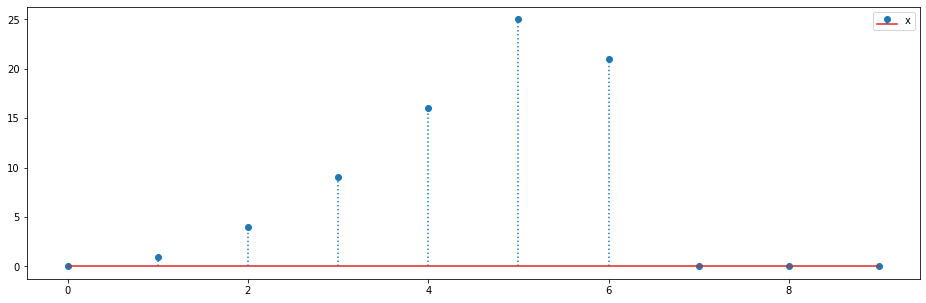

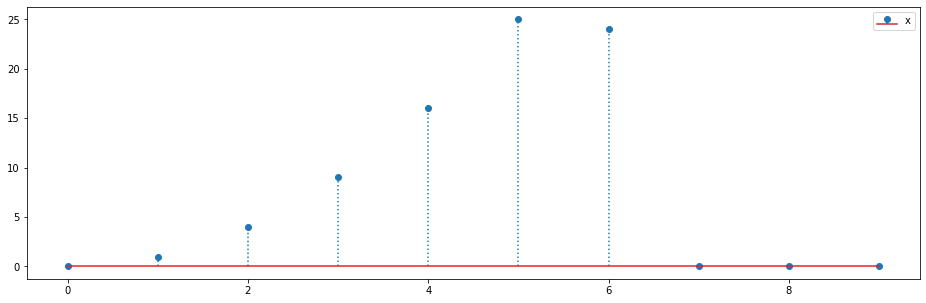

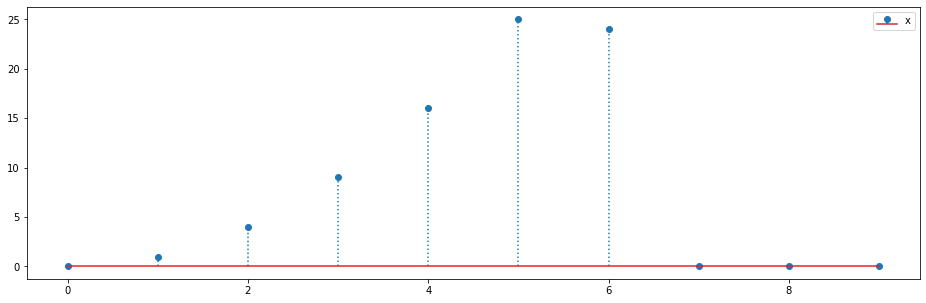

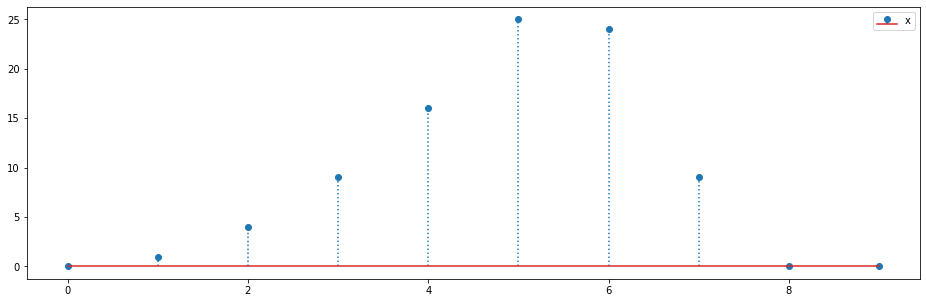

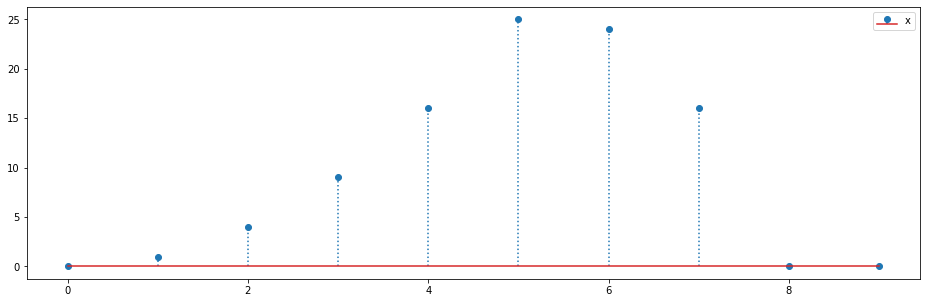

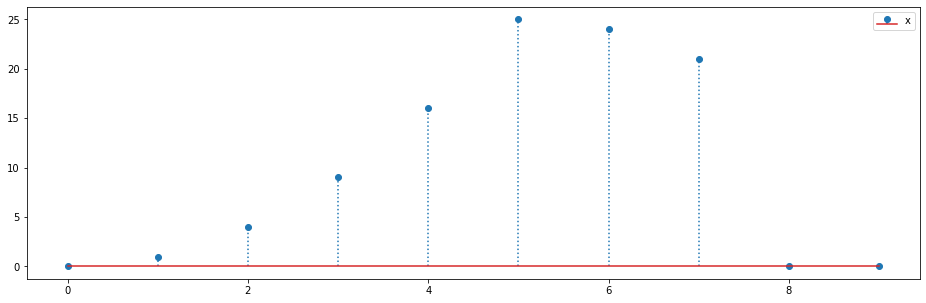

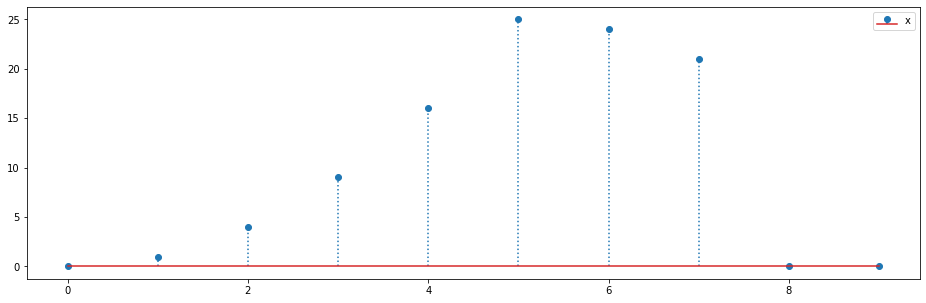

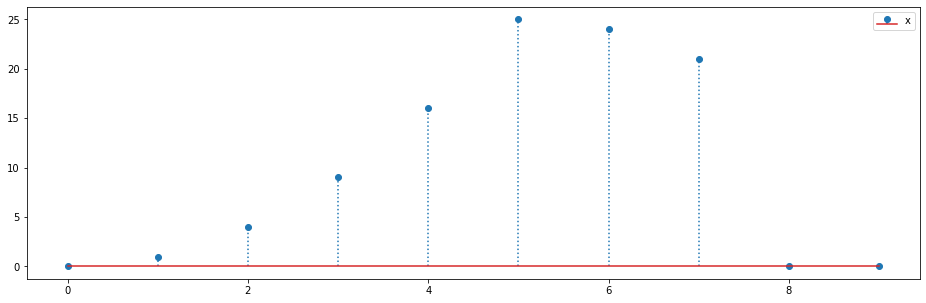

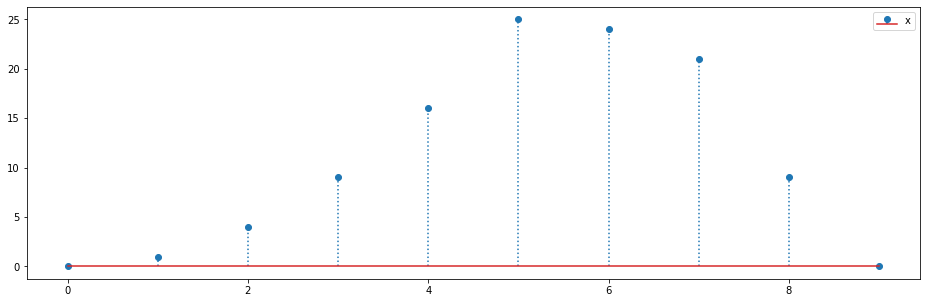

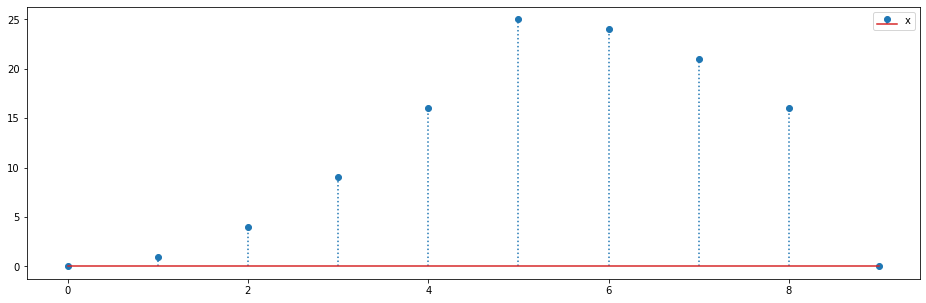

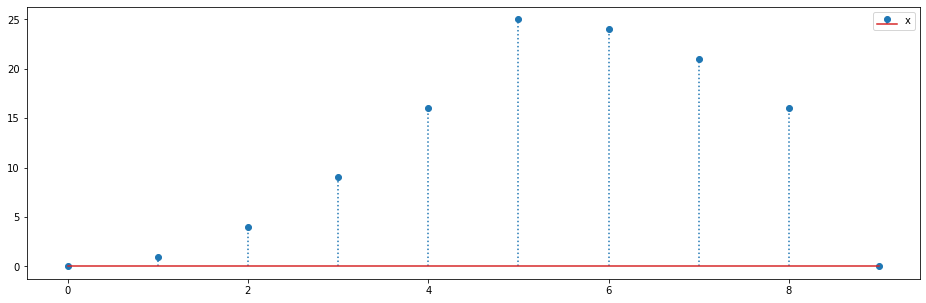

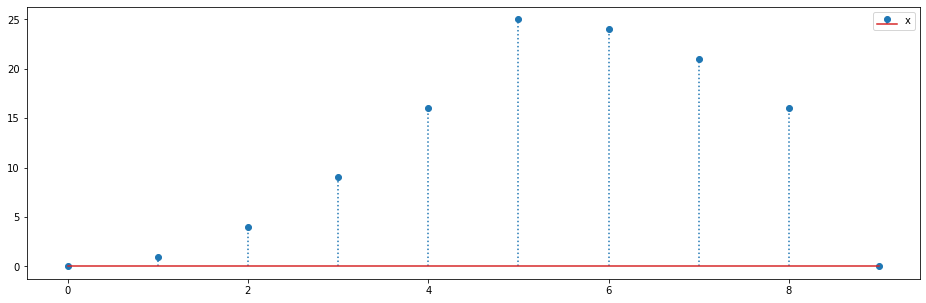

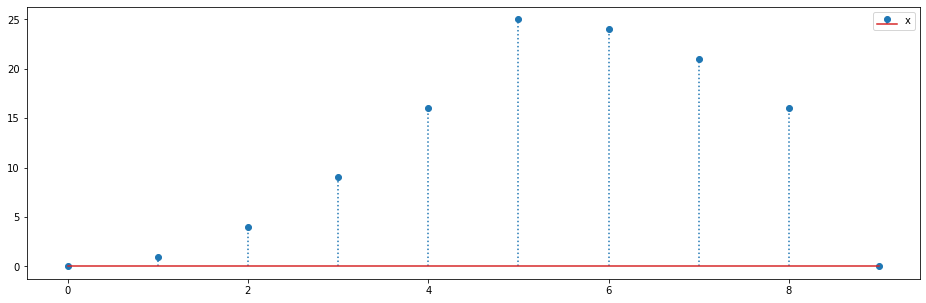

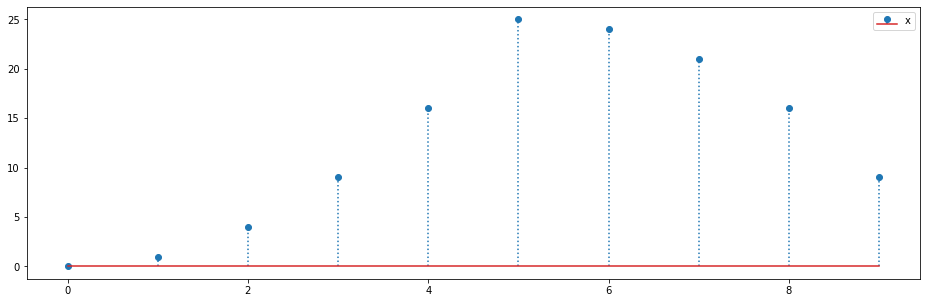

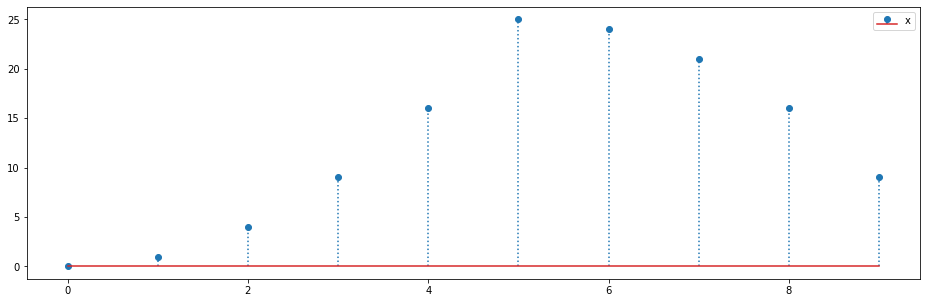

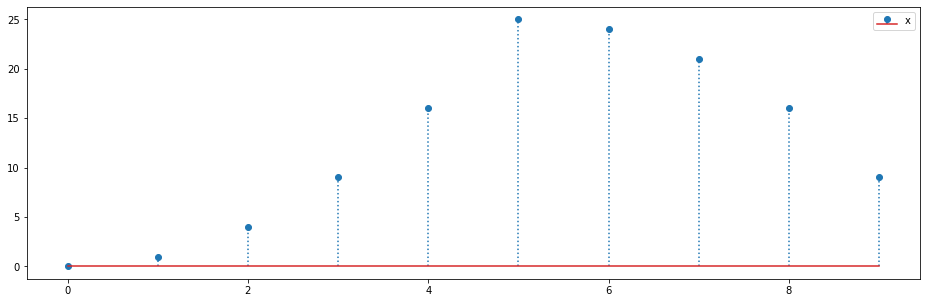

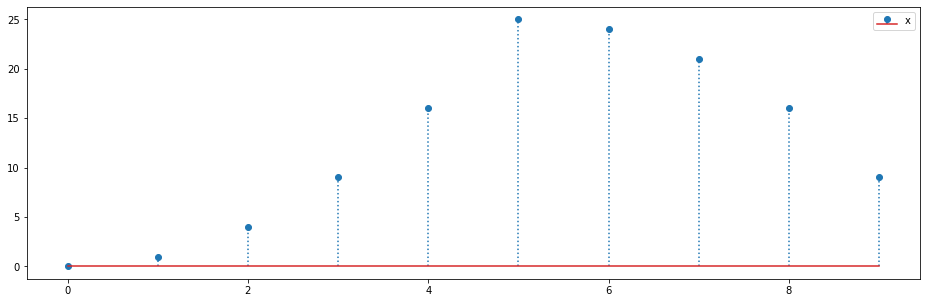

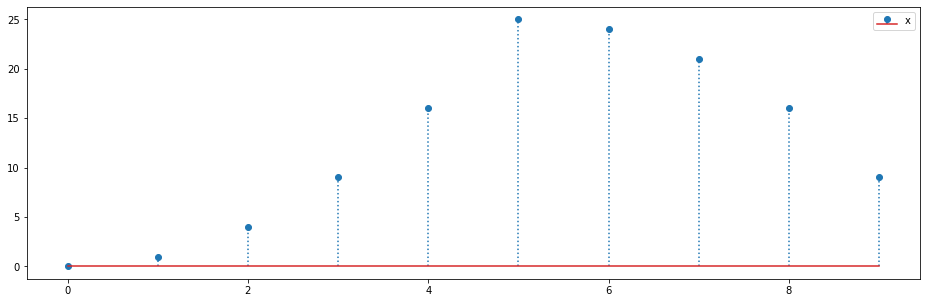

[ 0.  1.  4.  9. 16. 25. 24. 21. 16.  9.]


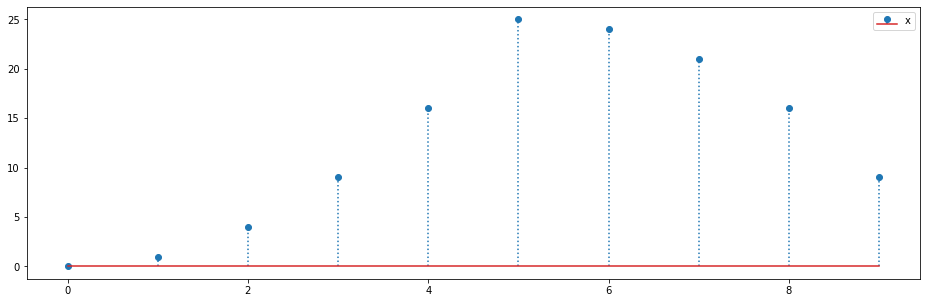

In [56]:
#convolucion

Y=np.zeros(len(x)+len(h))
xf=np.flip(x)
h3=np.insert(h,0,np.zeros(len(x)))
h3=np.insert(h3,len(h3),np.zeros(len(x)))

print(xf)
print(h3)

for j in np.arange(0,len(Y)):
    for k in np.arange(0,len(x)):
        YY=k+j
        #print(k,j,YY)
        Y[j]=xf[k]*h3[YY]+Y[j]
        stem(n3,Y)
                        

n3=np.arange(0,len(Y))

print(Y)
stem(n3,Y)